In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [10]:
def find_pcr_n_alt(v_R, v_t):
    v1 = v_R
    v2 = v_t / v_R
    # print(f'({v1:.3f},{v2:.3f})')
    nu = 0.5

    n_all = [2,3,4,5,6]

    p_cr = lambda n: ((np.pi*v1)**2 + n**2)**2 * v2**3 / (12 * (1-nu**2) * n**2) + (np.pi*v1)**4 * v2/(n**2 * ((np.pi*v1)**2 + n**2)**2)

    p_cr_all = [p_cr(n) for n in n_all]
    idx_min = np.argmin(p_cr_all)
    return (n_all[idx_min], p_cr_all[idx_min])

def find_pcr_n(R,H,t):
    v_R = R/H
    v_t = t/H

    return find_pcr_n_alt(v_R = v_R, v_t = v_t)

def find_n(R,t,H):
    v_R = R/H
    v_t = t/H

    n, _ = find_pcr_n_alt(v_R, v_t)
    return n


def find_n_alt(v_R, v_t):
    n, _ = find_pcr_n_alt(v_R, v_t)
    return n


In [11]:
def find_pcr_n_alt_v2(v_R, v_t):
    v1 = v_R
    v2 = v_t / v_R
    # print(f'({v1:.3f},{v2:.3f})')
    nu = 0.5

    n_all = [2,3,4,5,6]

    p_cr = lambda n: ((np.pi*v1)**2 + n**2)**2 * v2**3 / (12 * (1-nu**2) * (n**2 + np.pi**2 / 2 * v1**2)) + (np.pi*v1)**4 * v2/((n**2 + np.pi**2 / 2 * v1**2) * ((np.pi*v1)**2 + n**2)**2)

    p_cr_all = [p_cr(n) for n in n_all]
    idx_min = np.argmin(p_cr_all)
    return (n_all[idx_min], p_cr_all[idx_min])

def find_n_alt_v2(v_R, v_t):
    n, _ = find_pcr_n_alt_v2(v_R, v_t)
    return n

def find_pcr_n_v2(R,H,t):
    v_R = R/H
    v_t = t/H

    return find_pcr_n_alt_v2(v_R = v_R, v_t = v_t)

In [17]:
E = 1.1
n,p_cr = find_pcr_n(R = 8.8, H = 44.75, t = 1.2)
print(f'{n} folds: p_cr/E = {p_cr:.3e}, p_cr = {p_cr*1e3*E:.3} kPa')

n,p_cr = find_pcr_n(R = 10, H = 27, t = 0.56)
print(f'{n} folds: p_cr/E = {p_cr:.3e}, p_cr = {p_cr*1e3*E:.3} kPa')

n,p_cr = find_pcr_n(R = 10, H = 18, t = 0.56)
print(f'{n} folds: p_cr/E = {p_cr:.3e}, p_cr = {p_cr*1e3*E:.3} kPa')

2 folds: p_cr/E = 1.611e-03, p_cr = 1.77 kPa
3 folds: p_cr/E = 3.388e-04, p_cr = 0.373 kPa
4 folds: p_cr/E = 5.319e-04, p_cr = 0.585 kPa


In [60]:
find_n_alt(v_R = 0.6, v_t = 0.01)

6

In [43]:
'''w/ adjustment:'''
E = 1.2

t = 1.2
n,p_cr = find_pcr_n(R = 8.8 + t/2, H = 44.75, t = t)
print(f'{n} folds: p_cr/E = {p_cr:.3e}, p_cr = {p_cr*1e3*E:.3} kPa')

t = 0.54
n,p_cr = find_pcr_n(R = 10 + t/2, H = 27, t = t)
print(f'{n} folds: p_cr/E = {p_cr:.3e}, p_cr = {p_cr*1e3*E:.3} kPa')

n,p_cr = find_pcr_n(R = 10 + t/2, H = 18, t = t)
print(f'{n} folds: p_cr/E = {p_cr:.3e}, p_cr = {p_cr*1e3*E:.3} kPa')

2 folds: p_cr/E = 1.445e-03, p_cr = 1.73 kPa
3 folds: p_cr/E = 3.047e-04, p_cr = 0.366 kPa
4 folds: p_cr/E = 4.645e-04, p_cr = 0.557 kPa


In [46]:
'''w/o adjustment:'''
E = 1.2

t = 1.2
n,p_cr = find_pcr_n(R = 17.94/2, H = 44.75, t = t)
print(f'{n} folds: p_cr/E = {p_cr:.3e}, p_cr = {p_cr*1e3*E:.3} kPa')

t = 0.54
n,p_cr = find_pcr_n(R = 10, H = 27, t = t)
print(f'{n} folds: p_cr/E = {p_cr:.3e}, p_cr = {p_cr*1e3*E:.3} kPa')

n,p_cr = find_pcr_n(R = 10, H = 18, t = t)
print(f'{n} folds: p_cr/E = {p_cr:.3e}, p_cr = {p_cr*1e3*E:.3} kPa')

2 folds: p_cr/E = 1.558e-03, p_cr = 1.87 kPa
3 folds: p_cr/E = 3.110e-04, p_cr = 0.373 kPa
4 folds: p_cr/E = 4.830e-04, p_cr = 0.58 kPa


In [88]:
'''w/ adjustment + adding hydrostatic pressure factor:'''
E = 1.2

t = 1.2
n,p_cr = find_pcr_n_v2(R = 8.8 + t/2, H = 44.75, t = t)
print(f'{n} folds: p_cr/E = {p_cr:.3e}, p_cr = {p_cr*1e3*E:.3} kPa')

t = 0.54
n,p_cr = find_pcr_n_v2(R = 10 + t/2, H = 27, t = t)
print(f'{n} folds: p_cr/E = {p_cr:.3e}, p_cr = {p_cr*1e3*E:.3} kPa')

n,p_cr = find_pcr_n_v2(R = 10 + t/2, H = 18, t = t)
print(f'{n} folds: p_cr/E = {p_cr:.3e}, p_cr = {p_cr*1e3*E:.3} kPa')

2 folds: p_cr/E = 1.370e-03, p_cr = 1.64 kPa
3 folds: p_cr/E = 2.823e-04, p_cr = 0.339 kPa
4 folds: p_cr/E = 4.222e-04, p_cr = 0.507 kPa


In [48]:
0.54/27

0.02

In [ ]:
'''
2 folds: ~1.95
3 folds: ~0.43
4 folds: ~0.58
'''

In [5]:
folds4 = (0.556,0.056)

In [6]:
R_possible = [8.8,10]
t_possible = np.linspace(0.5,0.6,20)
H_possible = np.linspace(30,35,10)

In [25]:
num_try_R = 400
num_try_t = 400
n_all = np.zeros((num_try_R, num_try_t), dtype = int)

res_all = np.zeros((num_try_R, num_try_t), dtype = int)
res_all_v2 = np.zeros((num_try_R, num_try_t), dtype = int)

v_R_try = np.linspace(0.1,0.6, num_try_R)
v_t_try = np.linspace(0.01,0.05, num_try_t)

for i,v_R in enumerate(v_R_try):
    for j,v_t in enumerate(v_t_try):
        res_all[i,j] = int(find_n_alt(v_R,v_t))
        res_all_v2[i,j] = int(find_n_alt_v2(v_R,v_t))

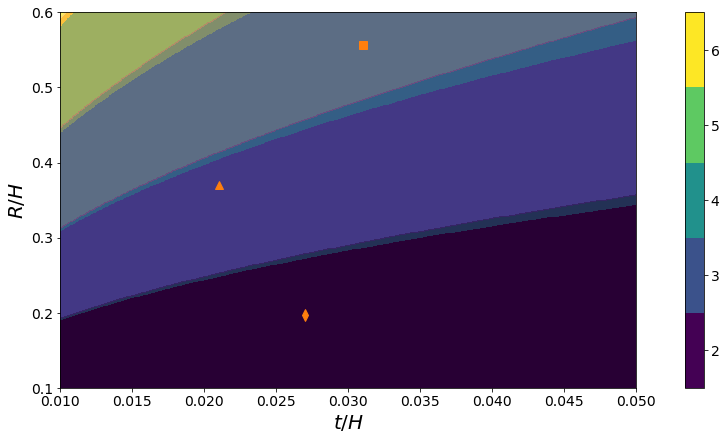

In [82]:
fig, ax = plt.subplots(figsize = (10,6), constrained_layout = True)

markersize_all = 8
# ax.imshow(res_all)
ax.plot(0.031, 0.556, 's', color = 'tab:orange', markersize = markersize_all)
ax.plot(0.027, 0.197, 'd', color = 'tab:orange', markersize = markersize_all)
ax.plot(0.021, 0.370, '^', color = 'tab:orange', markersize = markersize_all)
num_values = np.unique(res_all)
xv, yv = np.meshgrid(v_R_try, v_t_try, indexing='ij')
levels_set = np.arange(6) + 1.5
map_thing = ax.contourf(yv, xv, res_all, levels = levels_set, cmap = 'viridis', vmin = 2, vmax = 6)
ax.contourf(yv, xv, res_all_v2, levels = levels_set, cmap = 'magma', vmin = 2, vmax = 6, alpha = 0.4)



cbar = fig.colorbar(map_thing, ticks=[2,3,4,5,6])
# cbar.ax.set_yticklabels(['2', '3', '4', '5', '6'])
cbar.ax.tick_params(labelsize=14)
ax.set_xlabel('$t/H$', fontsize = 20)
ax.set_ylabel('$R/H$', fontsize = 20)
ax.tick_params(labelsize = 14)
ax.set_xlim(np.min(v_t_try), np.max(v_t_try))
ax.set_ylim(np.min(v_R_try), np.max(v_R_try))

fig.savefig('scream yi/heat_map_heread_v1.png', dpi = 300)


array([30.        , 30.55555556, 31.11111111, 31.66666667, 32.22222222,
       32.77777778, 33.33333333, 33.88888889, 34.44444444, 35.        ])

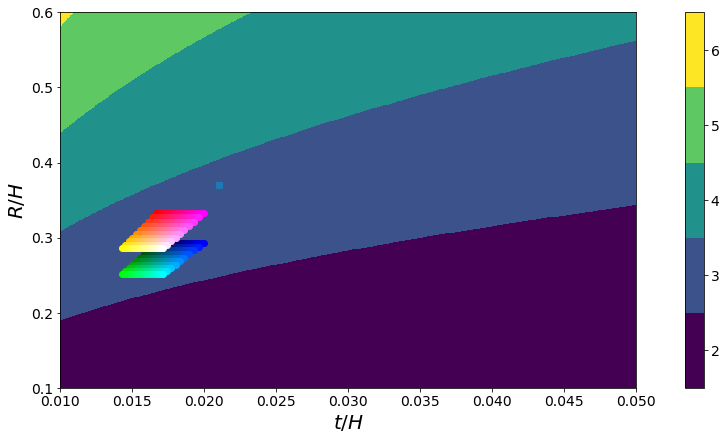

In [69]:
R_possible = [8.8,10]
t_possible = np.linspace(0.5,0.6,20)
H_possible = np.linspace(30,35,10)

fig, ax = plt.subplots(figsize = (10,6), constrained_layout = True)

for i,R in enumerate(R_possible):
    for j,H in enumerate(H_possible):
        for k,t in enumerate(t_possible):
            v_R = R/H
            v_t = t/H
            n = find_n_alt(v_R, v_t)
            # if n == 3:
            #     print(f'R = {R:.2f}, H = {H:.2f}, t = {t:.2f}')
            
            color_cur = (i/(len(R_possible)-1), j/(len(H_possible)-1), k/(len(t_possible)-1))
            ax.plot(v_t, v_R, 'o', color = color_cur)

# ax.plot(0.031, 0.556, '*', color = 'k')
# ax.plot(0.027, 0.197, 'o')
ax.plot(0.021, 0.370, 's')
num_values = np.unique(res_all)
xv, yv = np.meshgrid(v_R_try, v_t_try, indexing='ij')
levels_set = np.arange(6) + 1.5
map_thing = ax.contourf(yv, xv, res_all, levels = levels_set, cmap = 'viridis', vmin = 2, vmax = 6)



cbar = fig.colorbar(map_thing, ticks=[2,3,4,5,6])
cbar.ax.set_yticklabels(['2', '3', '4', '5', '6'])
cbar.ax.tick_params(labelsize=14)
ax.set_xlabel('$t/H$', fontsize = 20)
ax.set_ylabel('$R/H$', fontsize = 20)
ax.tick_params(labelsize = 14)
ax.set_xlim(np.min(v_t_try), np.max(v_t_try))
ax.set_ylim(np.min(v_R_try), np.max(v_R_try))

fig.savefig('scream yi/heat_map_heread_v1.jpg', dpi = 300)
H_possible


array([20.        , 20.55555556, 21.11111111, 21.66666667, 22.22222222,
       22.77777778, 23.33333333, 23.88888889, 24.44444444, 25.        ])

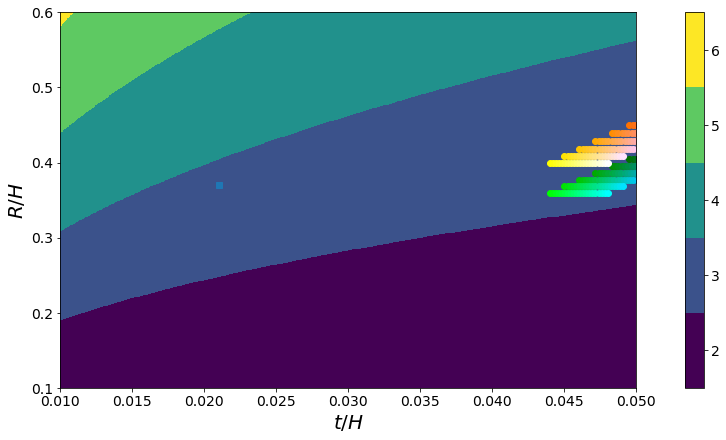

In [15]:
R_possible = [9,10]
t_possible = np.linspace(1.1,1.2,20)
H_possible = np.linspace(20,25,10)

fig, ax = plt.subplots(figsize = (10,6), constrained_layout = True)

for i,R in enumerate(R_possible):
    for j,H in enumerate(H_possible):
        for k,t in enumerate(t_possible):
            v_R = R/H
            v_t = t/H
            n = find_n_alt(v_R, v_t)
            # if n == 3:
            #     print(f'R = {R:.2f}, H = {H:.2f}, t = {t:.2f}')
            
            color_cur = (i/(len(R_possible)-1), j/(len(H_possible)-1), k/(len(t_possible)-1))
            ax.plot(v_t, v_R, 'o', color = color_cur)

# ax.plot(0.031, 0.556, '*', color = 'k')
# ax.plot(0.027, 0.197, 'o')
ax.plot(0.021, 0.370, 's')
num_values = np.unique(res_all)
xv, yv = np.meshgrid(v_R_try, v_t_try, indexing='ij')
levels_set = np.arange(6) + 1.5
map_thing = ax.contourf(yv, xv, res_all, levels = levels_set, vmin = 2, vmax = 6)



cbar = fig.colorbar(map_thing, ticks=[2,3,4,5,6])
cbar.ax.set_yticklabels(['2', '3', '4', '5', '6'])
cbar.ax.tick_params(labelsize=14)
ax.set_xlabel('$t/H$', fontsize = 20)
ax.set_ylabel('$R/H$', fontsize = 20)
ax.tick_params(labelsize = 14)
ax.set_xlim(np.min(v_t_try), np.max(v_t_try))
ax.set_ylim(np.min(v_R_try), np.max(v_R_try))

fig.savefig('scream yi/heat_map_heread_v1.jpg', dpi = 300)
H_possible


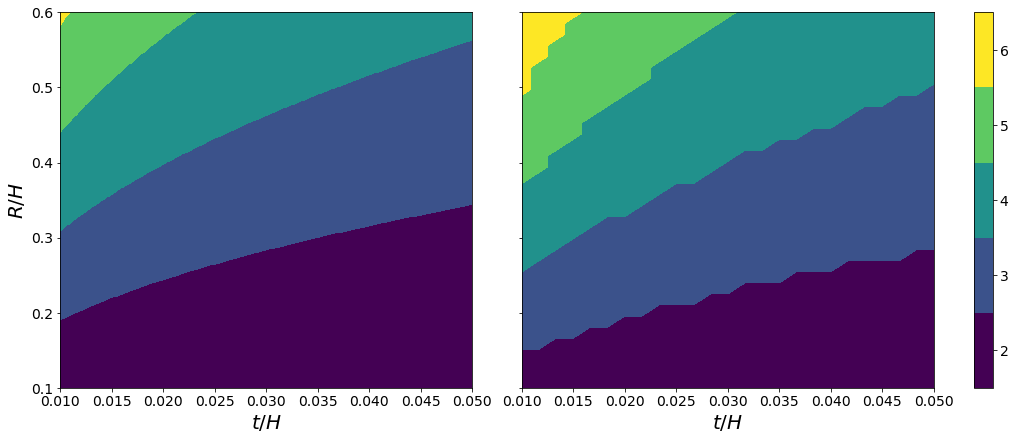

In [26]:
fig, ax = plt.subplots(1,2,figsize = (14,6), constrained_layout = True, sharey = True)

'''analytical'''
num_values = np.unique(res_all)
xv, yv = np.meshgrid(v_R_try, v_t_try, indexing='ij')
levels_set = np.arange(6) + 1.5
map_thing = ax[0].contourf(yv, xv, res_all, levels = levels_set, vmin = 2, vmax = 6)

'''fem'''
num_try_t_fem = 25
num_try_R_fem = 35
v_R_try_fem = np.linspace(0.1,0.6, num_try_R_fem) #R/H
v_t_try_fem = np.linspace(0.01,0.05, num_try_t_fem) #t/H

res_all_fem = np.loadtxt('data_out/initial_mode_tests.txt', dtype = int)
xv, yv = np.meshgrid(v_R_try_fem, v_t_try_fem, indexing='ij')
map_thing = ax[1].contourf(yv, xv, res_all_fem, levels = levels_set, vmin = 2, vmax = 6)


cbar = fig.colorbar(map_thing, ticks=[2,3,4,5,6])
cbar.ax.set_yticklabels(['2', '3', '4', '5', '6'])
cbar.ax.tick_params(labelsize=14)
ax[0].set_ylabel('$R/H$', fontsize = 20)
ax[0].set_ylim(np.min(v_R_try), np.max(v_R_try))
for axis in ax:
    axis.set_xlabel('$t/H$', fontsize = 20)
    axis.tick_params(labelsize = 14)
    axis.set_xlim(np.min(v_t_try), np.max(v_t_try))


Text(0.011, 0.56, '5/6')

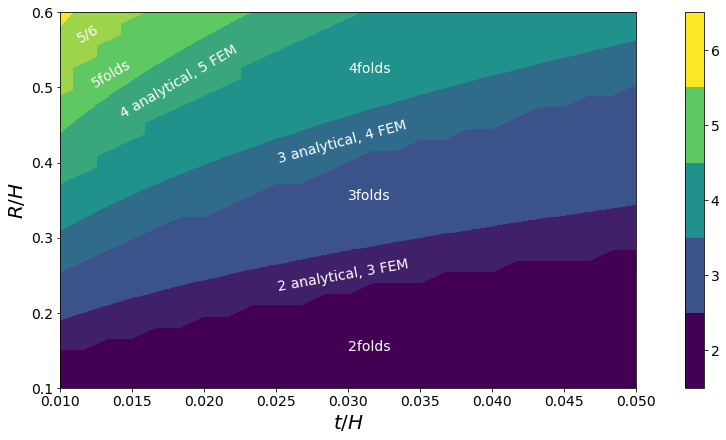

In [59]:
fig, ax = plt.subplots(figsize = (10,6), constrained_layout = True, sharey = True)

'''analytical'''
num_values = np.unique(res_all)
xv, yv = np.meshgrid(v_R_try, v_t_try, indexing='ij')
levels_set = np.arange(6) + 1.5
map_thing = ax.contourf(yv, xv, res_all, levels = levels_set, vmin = 2, vmax = 6)

cbar = fig.colorbar(map_thing, ticks=[2,3,4,5,6])
cbar.ax.set_yticklabels(['2', '3', '4', '5', '6'])

'''fem'''
num_try_t_fem = 25
num_try_R_fem = 35
v_R_try_fem = np.linspace(0.1,0.6, num_try_R_fem) #R/H
v_t_try_fem = np.linspace(0.01,0.05, num_try_t_fem) #t/H

res_all_fem = np.loadtxt('data_out/initial_mode_tests.txt', dtype = int)
xv, yv = np.meshgrid(v_R_try_fem, v_t_try_fem, indexing='ij')
map_thing = ax.contourf(yv, xv, res_all_fem, levels = levels_set, vmin = 2, vmax = 6, alpha = 0.4)


# cbar = fig.colorbar(map_thing, ticks=[2,3,4,5,6])
# cbar.ax.set_yticklabels(['2', '3', '4', '5', '6'])
cbar.ax.tick_params(labelsize=14)
ax.set_ylabel('$R/H$', fontsize = 20)
ax.set_ylim(np.min(v_R_try), np.max(v_R_try))
ax.set_xlabel('$t/H$', fontsize = 20)
ax.tick_params(labelsize = 14)
ax.set_xlim(np.min(v_t_try), np.max(v_t_try))

ax.text(0.03, 0.15, '2folds', color = 'white', fontsize = 14)
ax.text(0.025, 0.23, '2 analytical, 3 FEM', color = 'white', fontsize = 14, rotation = 10)
ax.text(0.03, 0.35, '3folds', color = 'white', fontsize = 14)
ax.text(0.025, 0.4, '3 analytical, 4 FEM', color = 'white', fontsize = 14, rotation = 15)
ax.text(0.03, 0.52, '4folds', color = 'white', fontsize = 14)
ax.text(0.014, 0.46, '4 analytical, 5 FEM', color = 'white', fontsize = 14, rotation = 30)
ax.text(0.012, 0.5, '5folds', color = 'white', fontsize = 14, rotation = 30)
ax.text(0.011, 0.56, '5/6', color = 'white', fontsize = 14, rotation = 30)

